In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data = {
    'дом': ['Морской проспект 29', 'Золотодолинская 35', 'Жемчужная 10', 'Цветной проезд 25', 'Пирогова 14', 'Терешковой 4', 'Терешковой 5', 'Терешковой 24', 'Академическая 19', 'Академическая 8', 'Весенний пр-д, 2/32', 'Цветной проезд, 7', 'Ильича, 11', 'Правды, 7а', 'Золотодолинская 23', 'Золотодолинская 7', 'Терешковой 8', 'Академика Коптюга проспект, 5', 'Морской проспект, 32', 'Детский проезд, 7', 'Морской проспект, 9', 'Терешковой, 33'],
    'широта': [54.834337, 54.830969, 54.835602, 54.839828, 54.847183, 54.841976, 54.843251, 54.841868, 54.837784, 54.835003, 54.838802, 54.837564, 54.839626, 54.839093, 54.834410, 54.837075, 54.841162, 54.844832, 54.837926, 54.840052, 54.839075, 54.837420],
    'долгота': [83.096963, 83.104293, 83.092879, 83.092427, 83.092155, 83.097675, 83.104897, 83.108978, 83.111287, 83.111004, 83.088646, 83.096273, 83.098109, 83.100507, 83.104907, 83.106454, 83.100090, 83.103337, 83.103564, 83.105238, 83.110259, 83.116503],
    'жильцов': [480, 50, 200, 350, 700, 400, 10, 160, 450, 500, 300, 400, 350, 280, 170, 300, 900, 850, 450, 300, 280, 1250]
}

df = pd.DataFrame(data)
print(df)

                              дом     широта    долгота  жильцов
0             Морской проспект 29  54.834337  83.096963      480
1              Золотодолинская 35  54.830969  83.104293       50
2                    Жемчужная 10  54.835602  83.092879      200
3               Цветной проезд 25  54.839828  83.092427      350
4                     Пирогова 14  54.847183  83.092155      700
5                    Терешковой 4  54.841976  83.097675      400
6                    Терешковой 5  54.843251  83.104897       10
7                   Терешковой 24  54.841868  83.108978      160
8                Академическая 19  54.837784  83.111287      450
9                 Академическая 8  54.835003  83.111004      500
10            Весенний пр-д, 2/32  54.838802  83.088646      300
11              Цветной проезд, 7  54.837564  83.096273      400
12                     Ильича, 11  54.839626  83.098109      350
13                     Правды, 7а  54.839093  83.100507      280
14             Золотодоли

In [74]:
shops_data = {
    'Магазин': ['Flora ОПТ', 'Клумба', 'Anna', 'Белый сад', 'Гран-при', 'Цветочная мастерская', 'Дон пион'],
    'широта': [54.840327, 54.840522, 54.839870, 54.839654, 54.837185, 54.838893, 54.831012],
    'долгота': [83.110730, 83.109432, 83.108101, 83.107318, 83.101823, 83.096541, 83.105287],
    'ассортимент': [91, 30, 114, 26, 50, 68, 34],
    'цена': [90, 140, 80, 250, 100, 130, 200]
}

shops_df = pd.DataFrame(shops_data)
print(shops_df)

                Магазин     широта    долгота  ассортимент  цена
0             Flora ОПТ  54.840327  83.110730           91    90
1                Клумба  54.840522  83.109432           30   140
2                  Anna  54.839870  83.108101          114    80
3             Белый сад  54.839654  83.107318           26   250
4              Гран-при  54.837185  83.101823           50   100
5  Цветочная мастерская  54.838893  83.096541           68   130
6              Дон пион  54.831012  83.105287           34   200


Реализация Агентно-ориентированные модели геомаркетинга

In [75]:
class GeomarketingABM:
    def __init__(self, df : pd.DataFrame, shops_df : pd.DataFrame, eta = 1.5, tau = 0.5, \
                 alpha = 0.1, beta = 4./52., bucket_size = 7, retail_flower_price = 50):
        """
        Конструктор агентно-ориентированной модели геомаркетинга

        :param df: Датафрейм со столбцами ['дом', 'широта', 'долгота', 'жильцов'].
        :type df: pandas.DataFrame
        :param shops_df: Датафрейм со столбцами ['дом', 'широта', 'долгота', 'жильцов'].
        :type shops_df: pandas.DataFrame
        :param eta: Степень для цены.
        :type eta: float
        :param tau: Коэффициент для расстояния.
        :type tau: float
        :param alpha: Коэффициент для ассортимента.
        :type alpha: float
        :param beta: Вероятность покупки букета.
        :type beta: float
        :param bucket_size: Количество цветов в букете при покупке.
        :type bucket_size: int
        :param retail_flower_price: Розничная цена за 1 цветок.
        :type retail_flower_price: float
        """
        self.df = df
        self.shops_df = shops_df
        self.eta = eta
        self.tau = tau
        self.alpha = alpha
        self.beta = beta
        self.bucket_size = bucket_size
        self.retail_flower_price = retail_flower_price
        self.attractiveness = None
        self.probabilities = None
        self.expected_customers = None
        self.num_customers = None

    # Функция для расчета расстояния между двумя точками (широта, долгота)
    def calculate_distance(self, lat1, lon1, lat2, lon2) -> float:
        """
        Описание назначения метода.

        :param lat1: Долгота первой точки.
        :type lat1: float
        :param lon1: Широта первой точки.
        :type lon1: float
        :param lat2: Долгота второй точки.
        :type lat2: float
        :param lon2: Широта второй точки.
        :type lon2: float
        :return: Расстояние в км между двумя точками.
        :rtype: float
        """
        return np.sqrt(((lat1 - lat2) * 111.7)**2 + ((lon1 - lon2) * 64)**2)

    # Расчет привлекательности магазинов для каждого дома
    def calculate_attractiveness(self) -> pd.DataFrame:
        """
        Описание назначения метода.

        :param param1: Описание первого параметра.
        :type param1: тип_параметра1
        :param param2: Описание второго параметра.
        :type param2: тип_параметра2
        :return: Описание возвращаемого значения.
        :rtype: тип_возвращаемого_значения
        """
        self.attractiveness = pd.DataFrame(index = self.df['дом'], \
                                           columns = self.shops_df['Магазин'])

        for _, row_i in self.df.iterrows():
            for _, row_j in self.shops_df.iterrows():
                r_ij = self.calculate_distance(row_i['широта'], row_i['долгота'], \
                                          row_j['широта'], row_j['долгота'])
                self.attractiveness.loc[row_i['дом'], row_j['Магазин']] = \
                np.exp(self.eta * (-np.log(row_j['цена'] * self.bucket_size + self.tau * r_ij) + \
                              self.alpha * np.log(row_j['ассортимент'])))
                   
        return self.attractiveness

    def calculate_probabilities(self) -> pd.DataFrame:
        """
        Расчет вероятностей посещения магазинов для каждого дома.

        :return: Датафрейм с вероятностями посещения магазинов для каждого дома.
        :rtype: pandas.DataFrame
        """
        # TODO : Add exceptions
        if(self.df is None):
            return None
        if(self.shops_df is None):
            return None
        
        if(self.attractiveness is None):
            self.calculate_attractiveness() 
        
        self.probabilities = \
            self.attractiveness.div(self.attractiveness.sum(axis = 1), axis = 0)
        # TODO : Философский вопрос о занулении self.attractiveness

        return self.probabilities
    
    def calculate_expected_customers(self) -> pd.DataFrame:
        """
        Расчет ожидаемого количества покупателей для каждого магазина

        :param param1: Описание первого параметра.
        :type param1: тип_параметра1
        :param param2: Описание второго параметра.
        :type param2: тип_параметра2
        :return: Описание возвращаемого значения.
        :rtype: тип_возвращаемого_значения
        """
        # TODO : Add exceptions
        if(self.df is None):
            return None
        if(self.shops_df is None):
            return None
        
        if(self.probabilities is None):
            self.calculate_probabilities()

        self.expected_customers = pd.Series(index = self.shops_df['Магазин'], dtype = float)

        for _, row_j in self.shops_df.iterrows():
          self.expected_customers.loc[row_j['Магазин']] = \
             (self.probabilities[row_j['Магазин']].values * self.df['жильцов'].values * self.beta).sum()
        return self.expected_customers

    def calculate_numeric_customers(self) -> pd.DataFrame:
        """
        Расчет численного количества покупателей для каждого магазина
        Детальное пояснение: Расчет численного количества покупателей:
        Создается Series num_customers, которая содержит фактическое количество
        покупателей для каждого магазина. Это рассчитывается путем случайного выбора
        магазинов для каждого дома с вероятностями, пропорциональными их привлекательности,
        и подсчета количества выборов для каждого магазина.

        :return: Описание возвращаемого значения.
        :rtype: тип_возвращаемого_значения
        """
        if(self.df is None):
            return None
        if(self.shops_df is None):
            return None
        
        if(self.probabilities is None):
            self.calculate_probabilities()
        
        self.num_customers = pd.Series(index = self.shops_df['Магазин'], dtype = int)

        for _, row_i in df.iterrows():
            choices = np.random.choice(self.shops_df['Магазин'], size = int(row_i['жильцов'] * self.beta), \
                                       p = self.probabilities.loc[row_i['дом']].values.astype(float))
            for shop in choices:
                if np.isnan(self.num_customers.loc[shop]):
                  self.num_customers.loc[shop] = 0
                self.num_customers.loc[shop] += 1

        return self.num_customers

In [76]:
# Создание модели
geomart_model = GeomarketingABM(df, shops_df)

## Проверка работоспособности

In [77]:
# Вывод результатов
print("Привлекательность магазинов для каждого дома:")
print(geomart_model.calculate_attractiveness())

Привлекательность магазинов для каждого дома:
Магазин                       Flora ОПТ    Клумба      Anna Белый сад  \
дом                                                                     
Морской проспект 29            0.000124  0.000054  0.000153  0.000022   
Золотодолинская 35             0.000124  0.000054  0.000153  0.000022   
Жемчужная 10                   0.000124  0.000054  0.000153  0.000022   
Цветной проезд 25              0.000124  0.000054  0.000153  0.000022   
Пирогова 14                    0.000124  0.000054  0.000153  0.000022   
Терешковой 4                   0.000124  0.000054  0.000153  0.000022   
Терешковой 5                   0.000124  0.000054  0.000153  0.000022   
Терешковой 24                  0.000124  0.000054  0.000154  0.000022   
Академическая 19               0.000124  0.000054  0.000153  0.000022   
Академическая 8                0.000124  0.000054  0.000153  0.000022   
Весенний пр-д, 2/32            0.000124  0.000054  0.000153  0.000022   
Цветн

In [78]:
print("Вероятности посещения магазинов для каждого дома:")
print(geomart_model.calculate_probabilities())

Вероятности посещения магазинов для каждого дома:
Магазин                       Flora ОПТ    Клумба      Anna Белый сад  \
дом                                                                     
Морской проспект 29            0.225032  0.098254  0.277764  0.040318   
Золотодолинская 35             0.225055  0.098261  0.277769  0.040321   
Жемчужная 10                   0.225022  0.098257   0.27775  0.040321   
Цветной проезд 25              0.225033  0.098259  0.277765   0.04032   
Пирогова 14                     0.22506  0.098281  0.277765  0.040331   
Терешковой 4                   0.225066  0.098261  0.277811  0.040315   
Терешковой 5                   0.225124   0.09827  0.277867  0.040313   
Терешковой 24                  0.225165  0.098274  0.277895  0.040309   
Академическая 19               0.225153  0.098265  0.277878   0.04031   
Академическая 8                0.225118  0.098264  0.277838  0.040314   
Весенний пр-д, 2/32            0.225021  0.098264  0.277741  0.040325   
Ц

In [79]:
print("Ожидаемое количество покупателей для каждого магазина:")
print(geomart_model.calculate_expected_customers())

Ожидаемое количество покупателей для каждого магазина:
Магазин
Flora ОПТ               158.083880
Клумба                   69.011375
Anna                    195.117630
Белый сад                28.313722
Гран-при                123.403599
Цветочная мастерская     87.196007
Дон пион                 41.181480
dtype: float64


In [80]:
print("Численное количество покупателей для каждого магазина:")
print(geomart_model.calculate_numeric_customers())

Численное количество покупателей для каждого магазина:
Магазин
Flora ОПТ               152.0
Клумба                   63.0
Anna                    196.0
Белый сад                27.0
Гран-при                121.0
Цветочная мастерская     89.0
Дон пион                 43.0
dtype: float64


## Эксперимент №1
При инициализации изменяем цену j-го магазина и смотрим, как меняется средняя прибыль этого магазина за T периодов. Построить график.

In [81]:
# Создаем список для хранения прибыли и цен
profits = []
prices = []
customers = []
real_price = geomart_model.shops_df.loc[0, 'цена']
# Цикл по периодам
for period in range(-9, 10):
    price_change = period * 10
    geomart_model.shops_df.loc[0, 'цена'] = real_price
    geomart_model.shops_df.loc[0, 'цена'] += price_change  # Изменяем цену для первого магазина
    
    geomart_model.attractiveness = None
    geomart_model.calculate_attractiveness()

    geomart_model.probabilities = None
    geomart_model.calculate_probabilities()

    geomart_model.expected_customers = None
    geomart_model.calculate_expected_customers()

    geomart_model.num_customers = None
    geomart_model.calculate_numeric_customers()

    # Расчет прибыли для первого магазина
    profit = geomart_model.num_customers.iloc[0] * \
                ((geomart_model.shops_df.loc[0, 'цена'] - geomart_model.retail_flower_price) * \
                geomart_model.bucket_size)
    profits.append(profit)
    prices.append(geomart_model.shops_df.loc[0, 'цена'])
    customers.append(geomart_model.num_customers.iloc[0])
geomart_model.shops_df.loc[0, 'цена'] = real_price

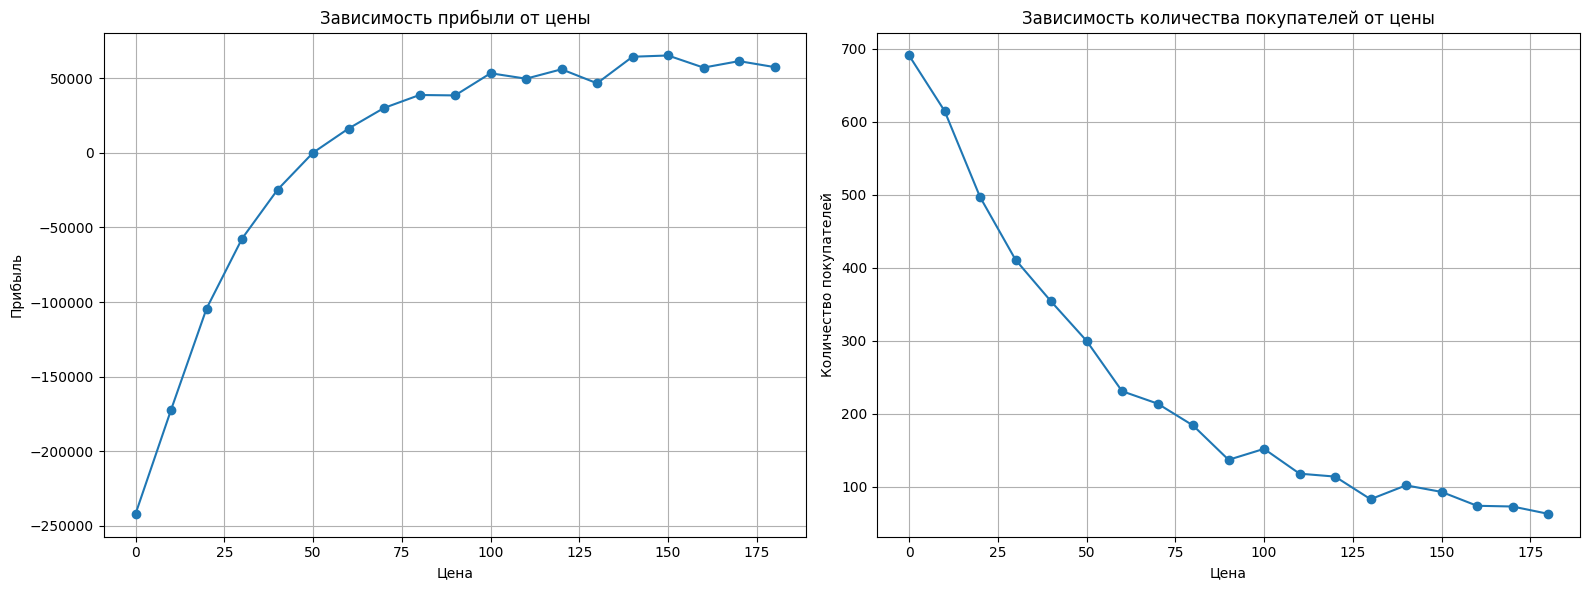

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График прибыли от цены
ax1.plot(prices, profits, marker='o')
ax1.set_xlabel('Цена')
ax1.set_ylabel('Прибыль')
ax1.set_title('Зависимость прибыли от цены')
ax1.grid()

# График количества покупателей от цены
ax2.plot(prices, customers, marker='o')
ax2.set_xlabel('Цена')
ax2.set_ylabel('Количество покупателей')
ax2.set_title('Зависимость количества покупателей от цены')
ax2.grid()

plt.tight_layout()
plt.show()

## Эксперимент №2
Берем несколько местоположений для нового магазина (см. ниже). Считаем среднюю прибыль нового магазина за T периодов. Делаем вывод, какое место самое удачное.
Пишем свой код. Если используется чужой код, то провести (обязательно!) какие-то интересные свои эксперименты.

In [83]:
new_shop_locations = [
    (54.838862,	83.088575),
(54.835195,	83.095801),
(54.835004,	83.105028),
(54.837092,	83.112345),
(54.836910,	83.097185),
(54.838112,	83.102244),
(54.841399,	83.095109),
(54.841079,	83.099047),
(54.843729,	83.101262),
(54.843216,	83.109304)
]
shop_collection = []
temp_shop = geomart_model.shops_df.copy()
for lat, lon in new_shop_locations:
  profits = []
  prices = []
  customers = []
  for period in range(-9, 10):
    geomart_model.shops_df = temp_shop.copy()
    # Добавляем новый магазин в датафрейм shops_df
    new_shop = pd.DataFrame({
            'Магазин': [f'{lat}-{lon}'],
            'широта': [lat],
            'долгота': [lon],
            'ассортимент': [100.],
            'цена': [100. + period * 10.]
        })
    geomart_model.shops_df = pd.concat([geomart_model.shops_df, new_shop], ignore_index = True)

    geomart_model.attractiveness = None
    geomart_model.calculate_attractiveness()

    geomart_model.probabilities = None
    geomart_model.calculate_probabilities()

    geomart_model.num_customers = None
    geomart_model.calculate_numeric_customers()

    # Расчет прибыли для расчётного магазина
    profit = geomart_model.num_customers.iloc[7] * \
                ((geomart_model.shops_df.loc[7, 'цена'] - \
                  geomart_model.retail_flower_price) * geomart_model.bucket_size)
    profits.append(profit)
    prices.append(geomart_model.shops_df.loc[7, 'цена'])
    customers.append(geomart_model.num_customers.iloc[0])

  shop_collection.append([profits, prices, customers])
geomart_model.shops_df = temp_shop

### Графики

Магазин в месте 54.838862-83.088575


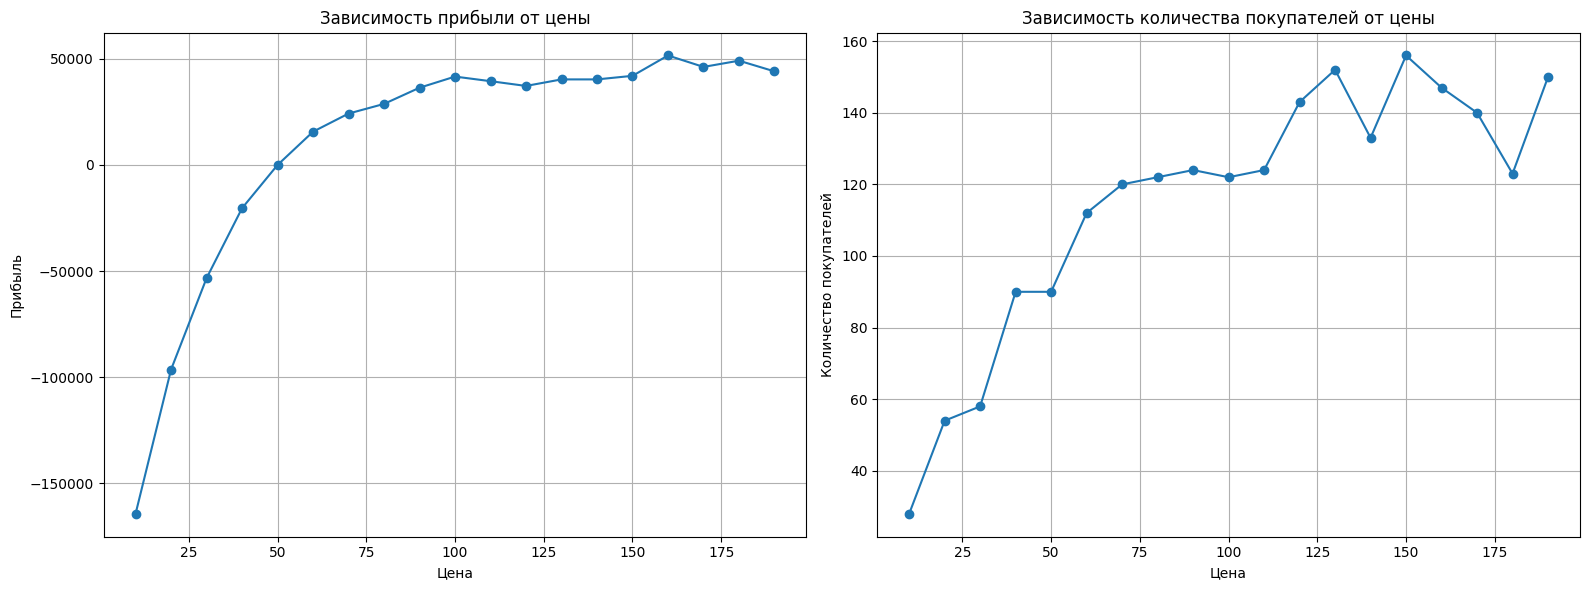

Магазин в месте 54.835195-83.095801


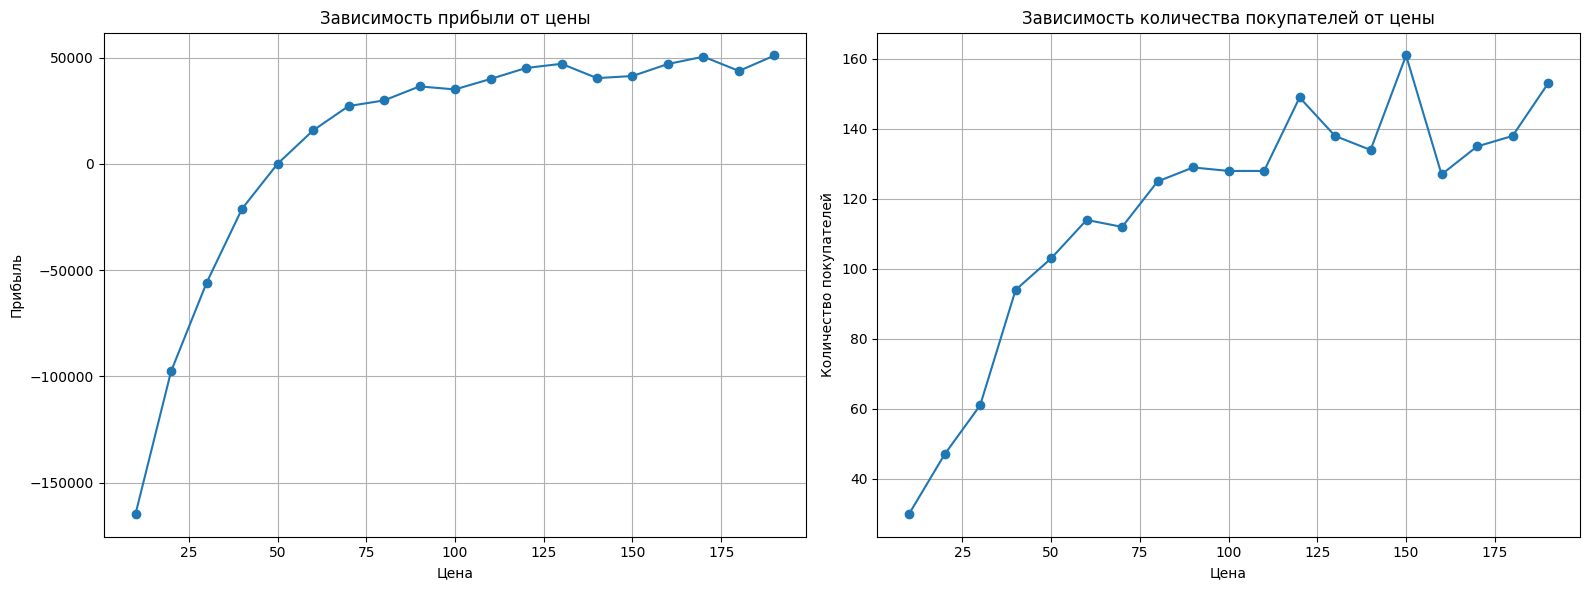

Магазин в месте 54.835004-83.105028


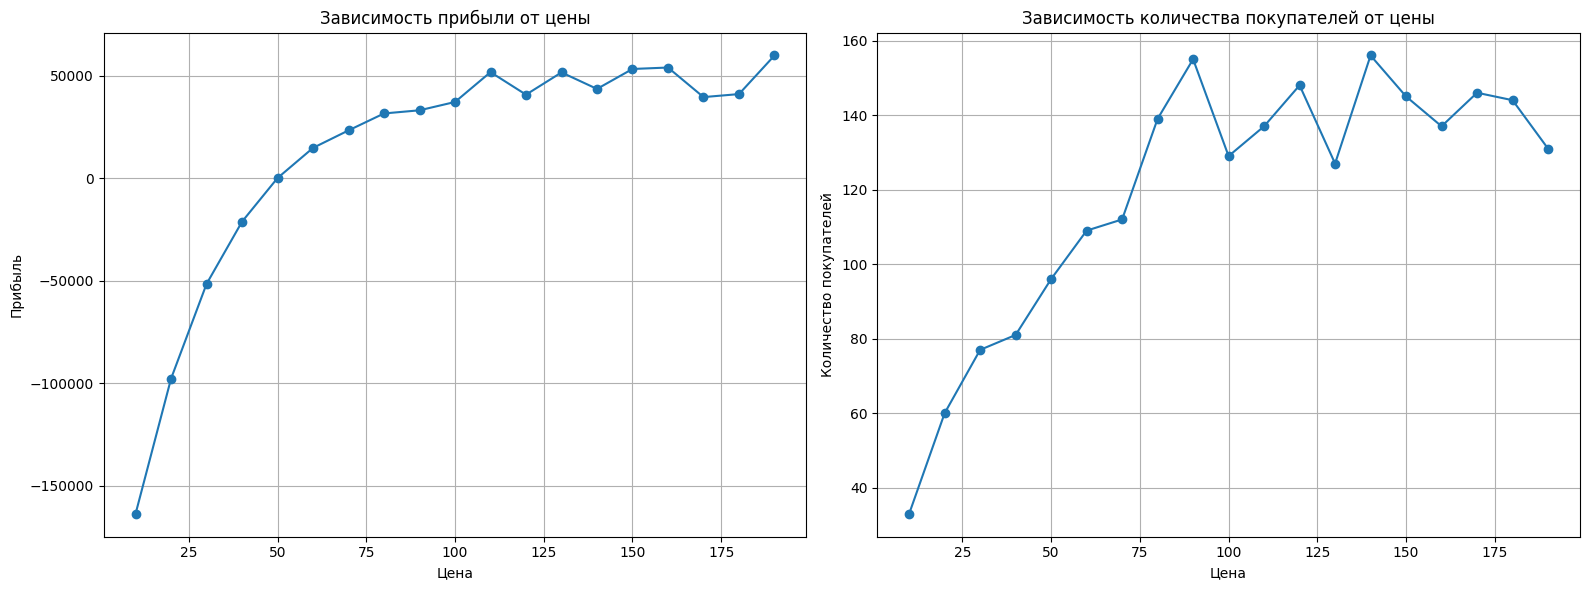

Магазин в месте 54.837092-83.112345


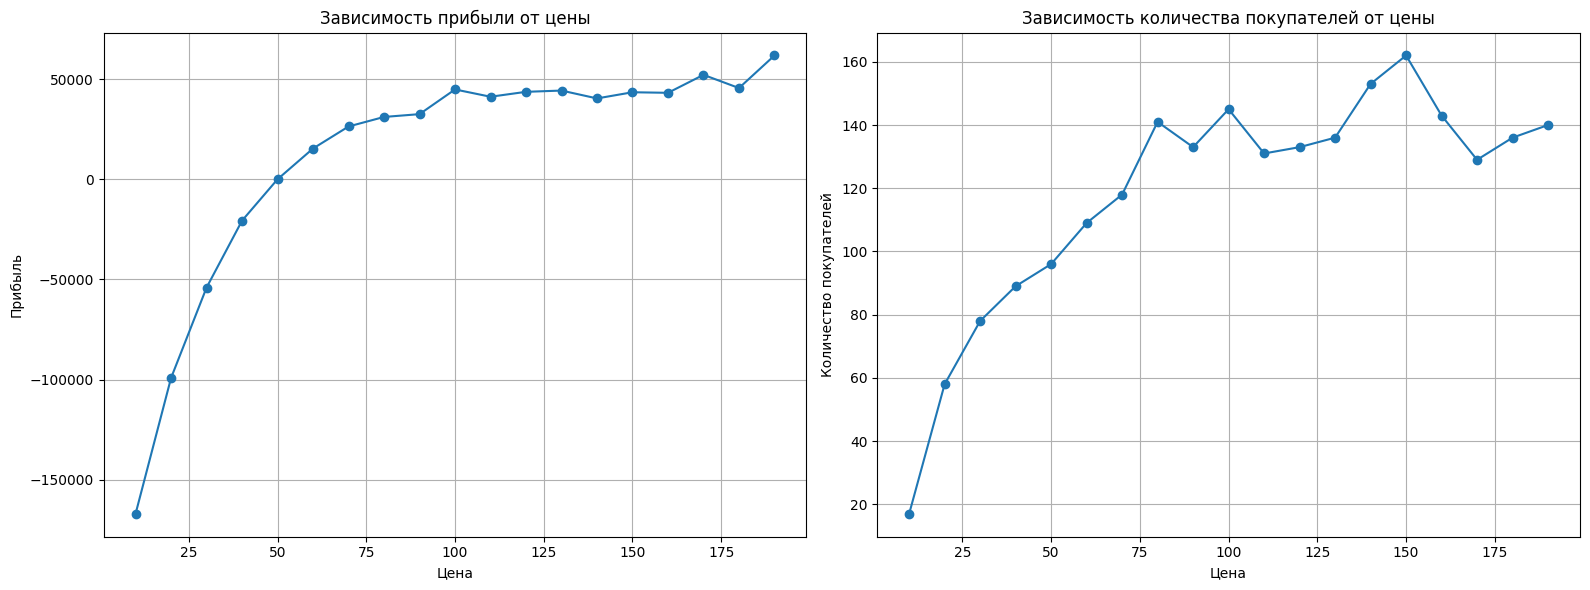

Магазин в месте 54.83691-83.097185


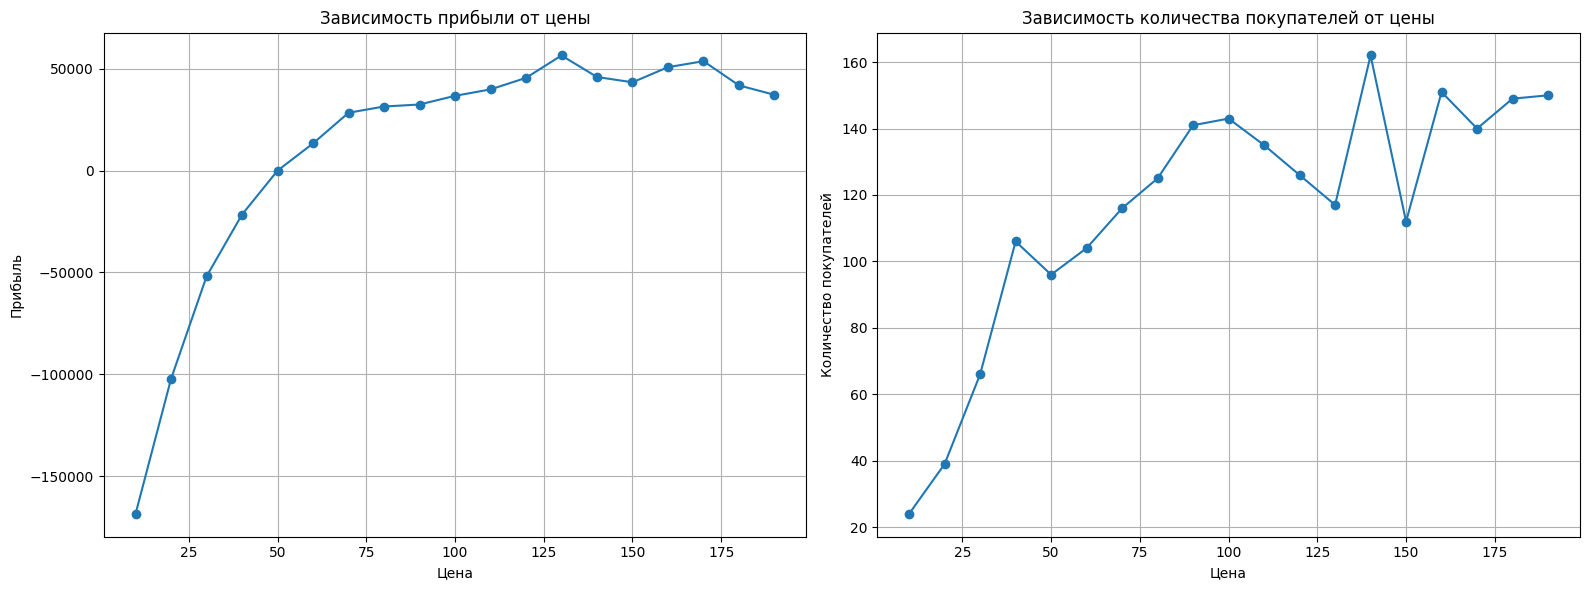

Магазин в месте 54.838112-83.102244


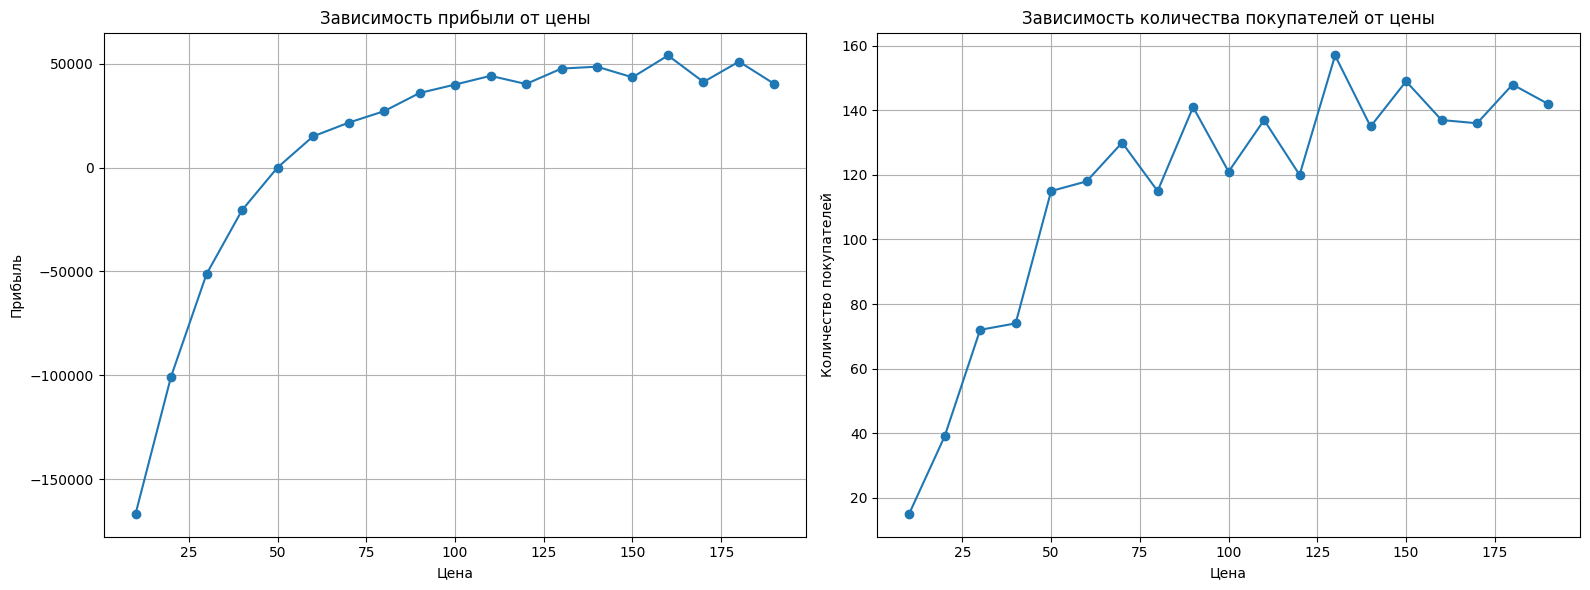

Магазин в месте 54.841399-83.095109


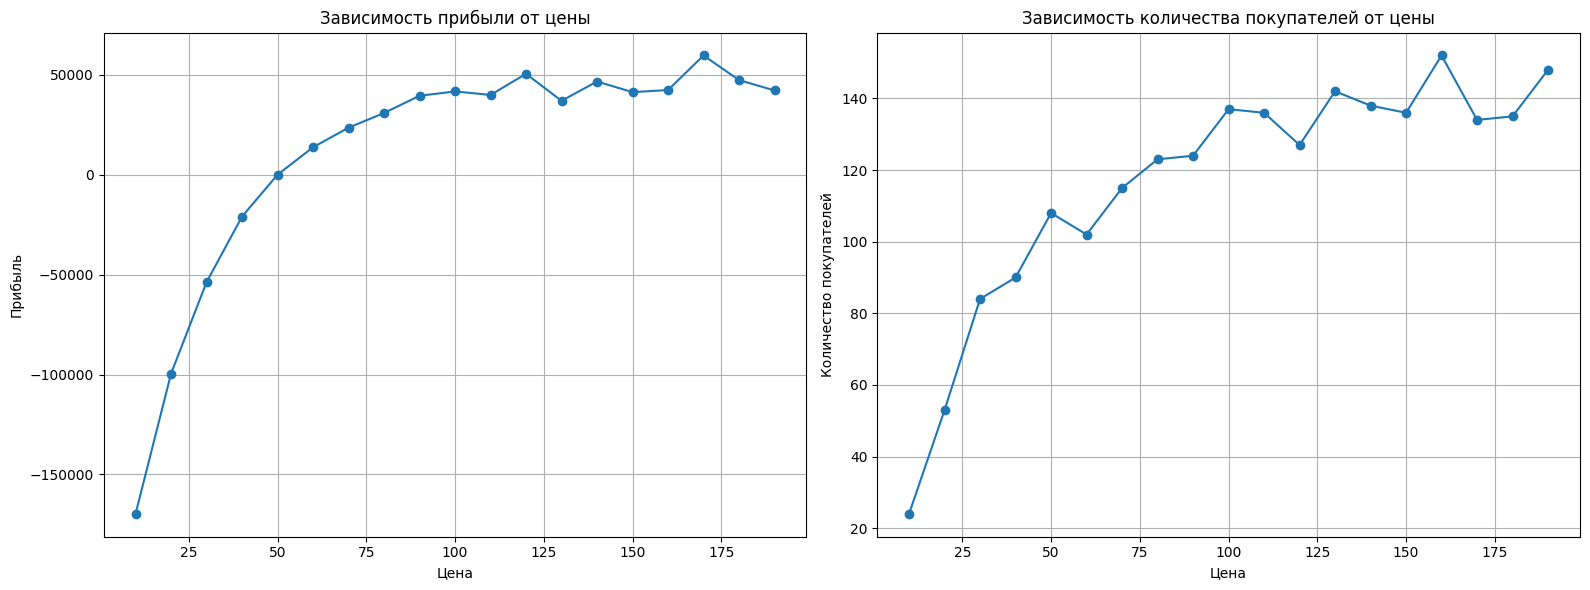

Магазин в месте 54.841079-83.099047


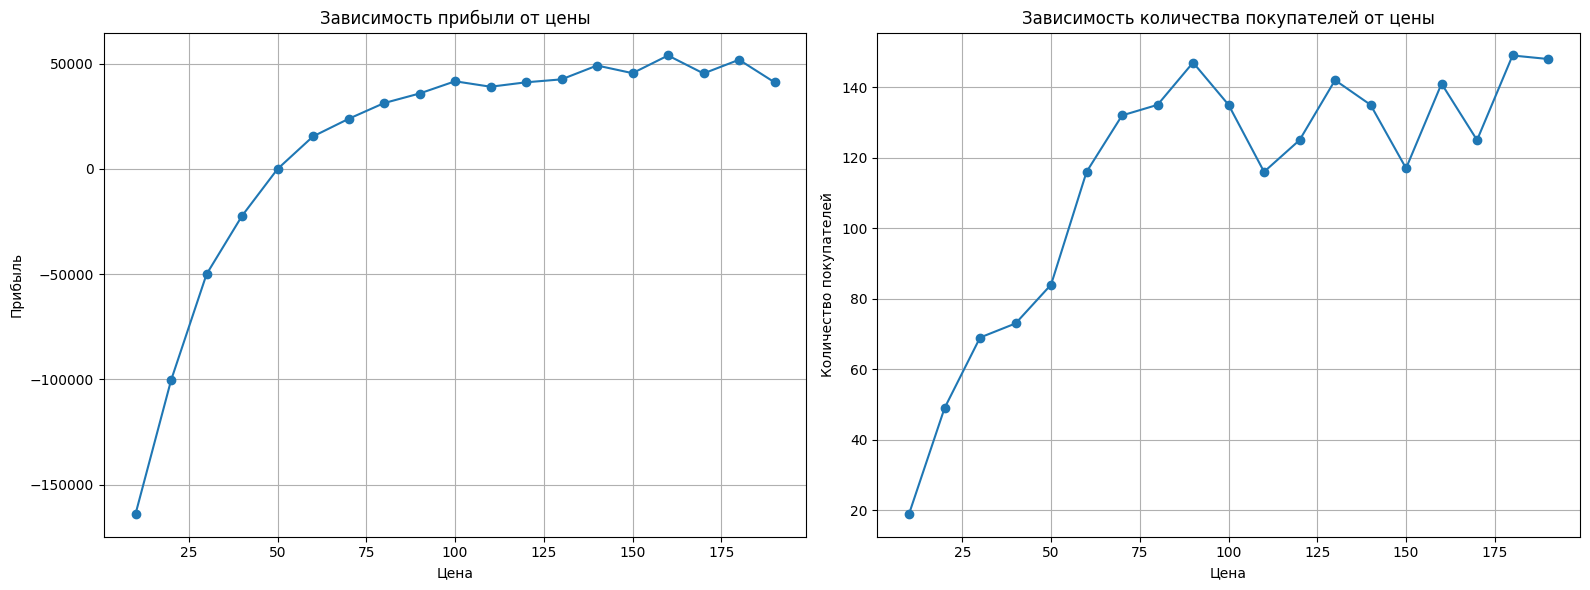

Магазин в месте 54.843729-83.101262


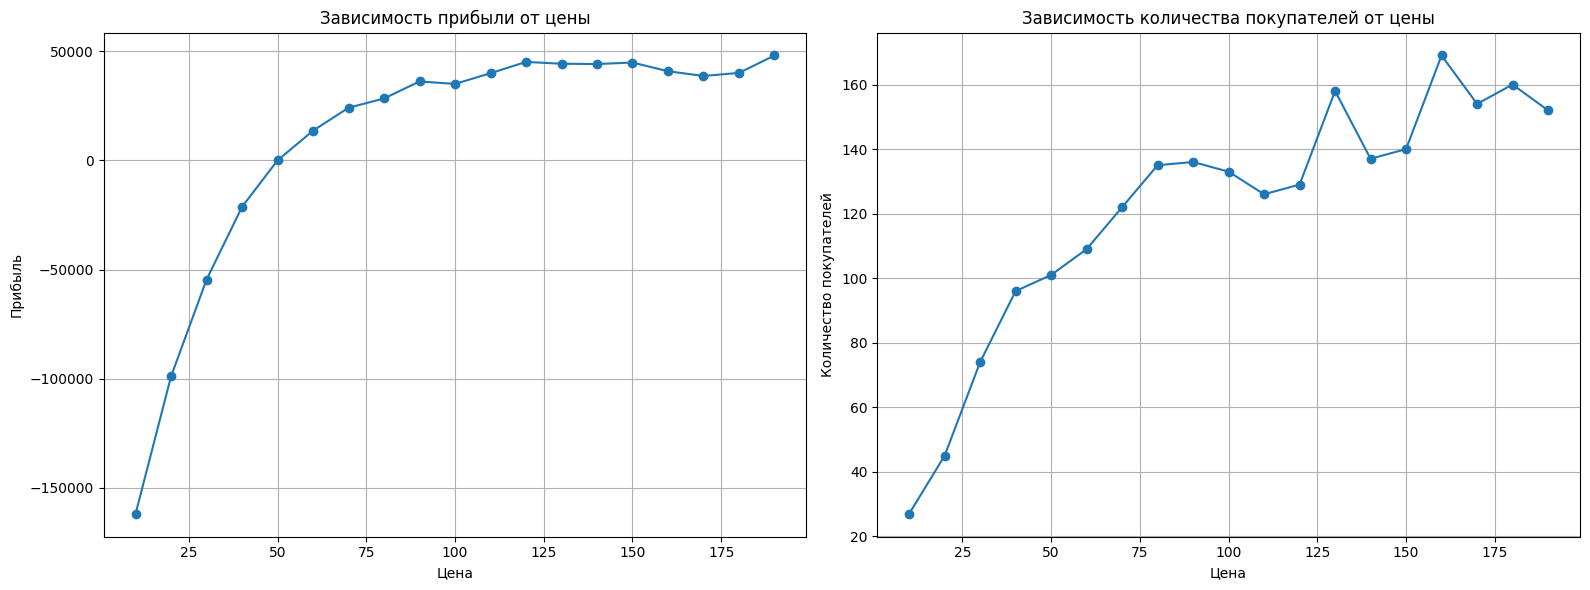

Магазин в месте 54.843216-83.109304


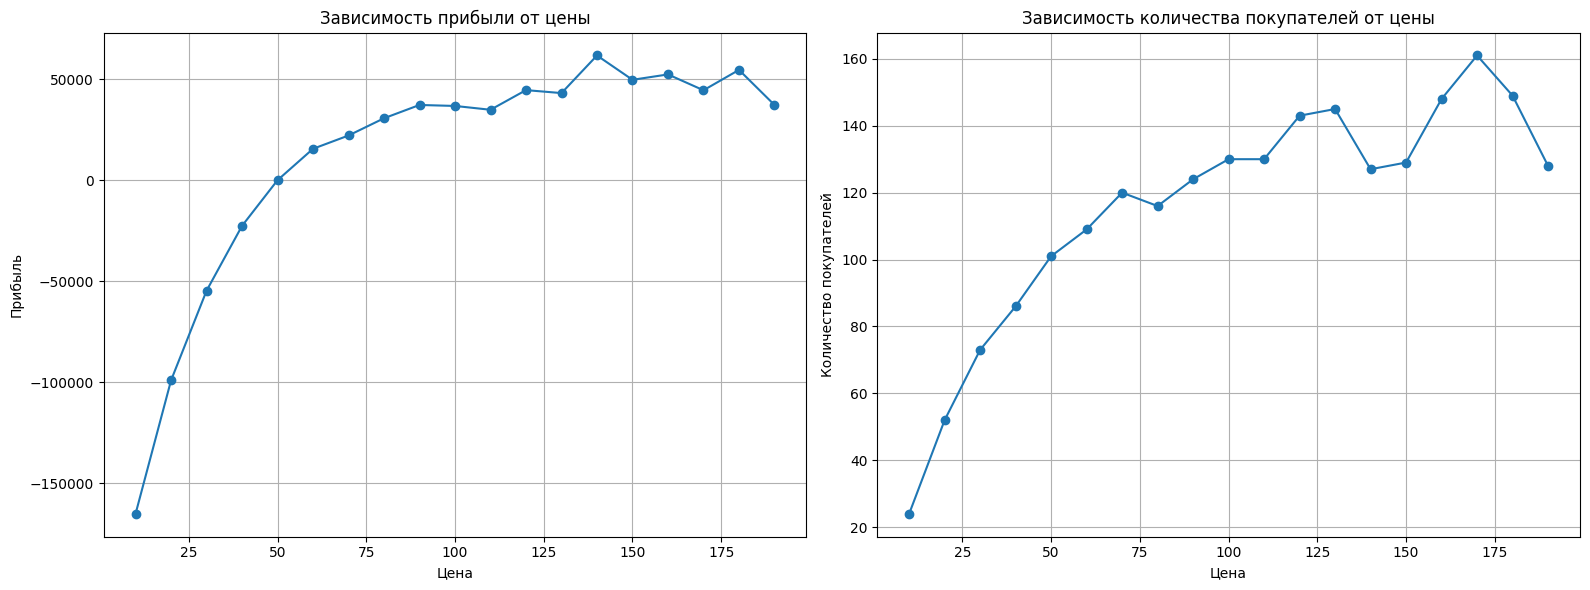

In [84]:
for i in range(len(new_shop_locations)):
  print(f"Магазин в месте {new_shop_locations[i][0]}-{new_shop_locations[i][1]}")
  profits, prices, customers = shop_collection[i]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  # График прибыли от цены
  ax1.plot(prices, profits, marker='o')
  ax1.set_xlabel('Цена')
  ax1.set_ylabel('Прибыль')
  ax1.set_title('Зависимость прибыли от цены')
  ax1.grid()

  # График количества покупателей от цены
  ax2.plot(prices, customers, marker='o')
  ax2.set_xlabel('Цена')
  ax2.set_ylabel('Количество покупателей')
  ax2.set_title('Зависимость количества покупателей от цены')
  ax2.grid()

  plt.tight_layout()
  plt.show()


### Поиск самой прибыльной точки

In [85]:
def find_most_profitable_locations(shop_collection, new_shop_locations):
    num_shops = len(shop_collection)
    num_prices = len(shop_collection[0][0])
    
    # Вычисляем прибыль для каждого магазина при каждой цене
    profits = []
    for i in range(num_shops):
        shop_profits = []
        for j in range(num_prices):
            profit = shop_collection[i][0][j]
            shop_profits.append(profit)
        profits.append(shop_profits)
    
    # Находим самое прибыльное место для каждой цены
    most_profitable_locations_per_price = []
    most_profitable_profits_per_price = []
    for j in range(num_prices):
        max_profit = float('-inf')
        max_location = None
        for i in range(num_shops):
            if profits[i][j] > max_profit:
                max_profit = profits[i][j]
                max_location = new_shop_locations[i]
        most_profitable_locations_per_price.append(max_location)
        most_profitable_profits_per_price.append(max_profit)
    
    # Находим самое прибыльное место среди всех мест
    max_profit = float('-inf')
    max_location = None
    for i in range(num_shops):
        for j in range(num_prices):
            if profits[i][j] > max_profit:
                max_profit = profits[i][j]
                max_location = new_shop_locations[i]
    
    return most_profitable_locations_per_price, most_profitable_profits_per_price, max_location, max_profit

In [86]:
most_prof_loc = find_most_profitable_locations(shop_collection, new_shop_locations)

In [87]:
most_prof_loc[0]

[(54.843729, 83.101262),
 (54.838862, 83.088575),
 (54.841079, 83.099047),
 (54.838862, 83.088575),
 (54.838862, 83.088575),
 (54.838862, 83.088575),
 (54.83691, 83.097185),
 (54.835004, 83.105028),
 (54.841399, 83.095109),
 (54.837092, 83.112345),
 (54.835004, 83.105028),
 (54.841399, 83.095109),
 (54.83691, 83.097185),
 (54.843216, 83.109304),
 (54.835004, 83.105028),
 (54.835004, 83.105028),
 (54.841399, 83.095109),
 (54.843216, 83.109304),
 (54.837092, 83.112345)]

In [88]:
most_prof_loc[1]

[-161840.0,
 -96390.0,
 -49980.0,
 -20370.0,
 0.0,
 15680.0,
 28420.0,
 31500.0,
 39480.0,
 44800.0,
 51660.0,
 50470.0,
 56560.0,
 61740.0,
 53200.0,
 53900.0,
 59640.0,
 54600.0,
 61740.0]

In [89]:
def find_max_index(arr):
    if len(arr) == 0:
        return None
    
    max_index = 0
    max_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] > max_value:
            max_value = arr[i]
            max_index = i
    
    return max_index

In [90]:
best_price_and_pos_index = find_max_index(most_prof_loc[1])

In [91]:
best_shop_index = new_shop_locations.index(most_prof_loc[0][best_price_and_pos_index])

In [92]:
most_prof_loc[0][best_price_and_pos_index]

(54.843216, 83.109304)

In [93]:
shop_collection[best_shop_index][2][best_price_and_pos_index]

127.0

In [94]:
changed_shops_df = shops_df.copy()
lat = most_prof_loc[0][best_price_and_pos_index][0]
lon = most_prof_loc[0][best_price_and_pos_index][1]
# Добавляем новый магазин в датафрейм shops_df
new_shop = pd.DataFrame({
        'Магазин': [f'{lat}-{lon}'],
        'широта': [lat],
        'долгота': [lon],
        'ассортимент': [100.],
        'цена': [shop_collection[best_shop_index][1][best_price_and_pos_index]]
    })
changed_shops_df = pd.concat([changed_shops_df, new_shop], ignore_index = True)

In [96]:
profits = []
prices = []
customers = []

temp_df = geomart_model.shops_df.copy()
geomart_model.shops_df = changed_shops_df

geomart_model.attractiveness = None
geomart_model.calculate_attractiveness()

geomart_model.probabilities = None
geomart_model.calculate_probabilities()

geomart_model.num_customers = None
geomart_model.calculate_numeric_customers()

# Расчет прибыли для каждого магазина
for j, row_j in changed_shops_df.iterrows():
    profit = geomart_model.num_customers.loc[row_j['Магазин']] * (row_j['цена'] * 7 - 350)
    profits.append(profit)
    prices.append(row_j['цена'])
    customers.append(geomart_model.num_customers.loc[row_j['Магазин']])

In [98]:
import folium

# Создаем карту с центром в указанных координатах и масштабом
map_center = [54.838, 83.105]
map_zoom = 14
shop_map = folium.Map(location = map_center, zoom_start = map_zoom)

# Итерируемся по каждой строке в DataFrame и добавляем маркер на карту
for index, row in changed_shops_df.iterrows():
    shop_name = row['Магазин']
    latitude = row['широта']
    longitude = row['долгота']
    assortment = row['ассортимент']
    price = row['цена']
    
    # Создаем текст для всплывающей подсказки маркера
    popup_text = f"Магазин: {shop_name}<br>Цена: {price}"
    
    # Добавляем маркер на карту
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(shop_map)

In [99]:
shop_map

In [100]:
import folium
from folium.plugins import HeatMap

# Создаем карту с центром в указанных координатах и масштабом
map_center = [54.838, 83.105]
map_zoom = 14
shop_map = folium.Map(location = map_center, zoom_start = map_zoom)

# Создаем список для хранения координат и доходности магазинов
heat_data = []

# Итерируемся по каждой строке в DataFrame и добавляем маркер на карту
for index, row in changed_shops_df.iterrows():
    shop_name = row['Магазин']
    latitude = row['широта']
    longitude = row['долгота']
    assortment = row['ассортимент']
    price = row['цена']
    profit = profits[index]
    # Добавляем координаты

    # Создаем текст для всплывающей подсказки маркера
    popup_text = f"Магазин: {shop_name}<br>Цена: {price}<br>Доходность: {profit}"
    
    # Добавляем маркер на карту
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(shop_map)

    # Добавляем координаты и доходность магазина в список для тепловой карты
    heat_data.append([latitude, longitude, profit])

# Определяем градиент цветов для тепловой карты
gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}

# Создаем тепловую карту с увеличенным радиусом и градиентом цветов
HeatMap(heat_data, gradient=gradient).add_to(shop_map)

In [101]:
shop_map

In [102]:
import folium
from scipy.interpolate import griddata
import numpy as np
from scipy.interpolate import Rbf

# Создаем карту с центром в указанных координатах и масштабом
map_center = [54.838, 83.105]
map_zoom = 14
shop_map = folium.Map(location = map_center, zoom_start = map_zoom)

# Создаем списки для хранения координат и доходности магазинов
latitudes = []
longitudes = []
profits_list = []

# Итерируемся по каждой строке в DataFrame и добавляем маркер на карту
for index, row in changed_shops_df.iterrows():
    shop_name = row['Магазин']
    latitude = row['широта']
    longitude = row['долгота']
    assortment = row['ассортимент']
    price = row['цена']
    profit = profits[index]  # Получаем доходность для текущего магазина
    
    latitudes.append(latitude)
    longitudes.append(longitude)
    profits_list.append(profit)
    
    # Создаем текст для всплывающей подсказки маркера
    popup_text = f"Магазин: {shop_name}<br>Цена: {price}"
    
    # Добавляем маркер на карту
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(shop_map)

# Создаем объект RadialBasisFunction
rbf = Rbf(longitudes, latitudes, profits_list, function='linear')

# Создаем сетку координат для интерполяции
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)
lat_range = np.linspace(lat_min, lat_max, 100)
lon_range = np.linspace(lon_min, lon_max, 100)
lon_grid, lat_grid = np.meshgrid(lon_range, lat_range)

# Выполняем интерполяцию значений доходности
#profits_grid = griddata((longitudes, latitudes), profits_list, (lon_grid, lat_grid), method='nearest')
profits_grid = rbf(lon_grid, lat_grid)
# Создаем тепловую карту с интерполированными значениями доходности
heatmap = folium.plugins.HeatMap(list(zip(np.concatenate([lat_grid.ravel(), latitudes]), 
                                          np.concatenate([lon_grid.ravel(), longitudes]), 
                                          np.concatenate([profits_grid.ravel(), profits_list]))),
                                 name='Heatmap')
heatmap.add_to(shop_map)

In [103]:
shop_map

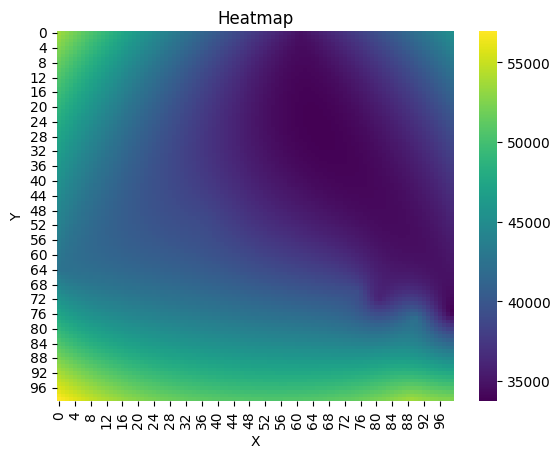

In [104]:
import seaborn as sns

# Строим heatmap
sns.heatmap(profits_grid, cmap='viridis')

# Добавляем заголовок и метки осей
plt.title('Heatmap')
plt.xlabel('X')
plt.ylabel('Y')

# Отображаем график
plt.show()